## Machine Learning HW2
0845209 . Siméon Gaumart

In [1]:
#importing libs
%matplotlib inline
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [2]:
#importing datas
try:
    data = pd.read_csv('./MEAP93.csv')
    math10=data["math10"].values
    lnchprg=data["lnchprg"].values
    expend=data["expend"].values
    logexpend=np.log10(expend)
    print("done")
except:
    print("error : read data fails")
    print("please put datas on the same folder")

done


# Problem 1

# question a

In [3]:
#define variables

def init(etaf):

    y = math10.reshape((len(math10),1))

    X = np.ones((len(lnchprg),3))
    for i in range (0,len(lnchprg)):
        X[i,1]=logexpend[i]
        X[i,2]=lnchprg[i]


    w=[]
    w.append(np.array([[1],[1],[1]]))

    y_pred=[]
    y_pred.append(X.dot(w[0]))

    eta=etaf

    tol=1e-5

    error=[]
    error.append(1)
    
    k=0
    
    return y,X,w,y_pred,eta,tol,error,k


def F(wf,yf,Xf):
    return (np.linalg.norm(yf-Xf.dot(wf),2))**2

def dF(wf,yf,Xf):
    Xt=np.transpose(Xf)
    return ((2*Xt).dot(Xf)).dot(wf)-(2*Xt).dot(yf)



k =  17267
sse =  114055.7613744898


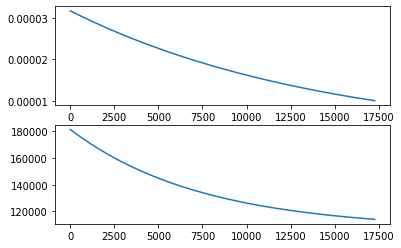

In [8]:
y,X,w,y_pred,eta,tol,error,k=init(1e-10)


while error[k]>=tol:
    
    w.append(w[k]-eta*dF(w[k],y,X))
    
    y_pred.append(X.dot(w[k+1]))
    
    error.append(np.linalg.norm(w[k]-w[k-1],2))
    
    k+=1

print("k = ",k)

y_pred_opti = y_pred[k]

sse = (np.linalg.norm(y_pred_opti-y,2))**2
print("sse = ",sse)

Lk=[]
for i in range(0,len(error)):
    Lk.append(i)



Lsse=[]
for i in range(0,len(Lk)):
    Lsse.append((np.linalg.norm(y_pred[i]-y,2))**2)

plt.subplot(2,1,1)
plt.plot(Lk[1:],error[1:])
plt.subplot(2,1,2)
plt.plot(Lk[0:],Lsse[0:])

# question b

k =  400
sse =  nan


/home/asministrateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in subtract
  


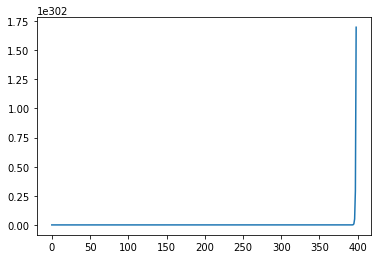

In [6]:
y,X,w,y_pred,eta,tol,error,k=init(1e-5)


while error[k]>=tol and k<100000:
    
    w.append(w[k]-eta*dF(w[k],y,X))
    
    y_pred.append(X.dot(w[k+1]))
    
    error.append(np.linalg.norm(w[k]-w[k-1],2))
    
    k+=1

print("k = ",k)

y_pred_opti = y_pred[k]

sse = (np.linalg.norm(y_pred_opti-y,2))**2
print("sse = ",sse)



Lk=[]
for i in range(0,len(error)):
    Lk.append(i)

plt.plot(Lk[:399],error[:399])



# question d

In [6]:
w_hw1=np.array([[-20.360816474189132],[14.344410366129082],[-0.30458530220642444]])
y_pred_opti_hw1=X.dot(w_hw1)
sse_hw1= (np.linalg.norm(y_pred_opti_hw1-y,2))**2
print(sse_hw1)

36753.355134970734


# Problem 2

In [1]:
import mnist #package from https://github.com/datapythonista/mnist to read mnist datas

train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
#reshape train_images and test_images that it fits with sklearn
X_train = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
X_test = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# question a

In [3]:
import sklearn.neighbors as skneighbors

In [4]:
%%time
model1 = skneighbors.KNeighborsClassifier(n_neighbors=1)
#model1 = skneighbors.NearestNeighbors(n_neighbors=1)
model1.fit(X_train,train_labels)
print(model1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
CPU times: user 1min 28s, sys: 563 ms, total: 1min 28s
Wall time: 1min 29s


In [5]:
%%time
score1 = model1.score(X_test, test_labels)
print("k=1  score="+str(score1*100)+"%")

k=1  score=96.91%
CPU times: user 21min 12s, sys: 275 ms, total: 21min 12s
Wall time: 21min 15s


In [4]:
%%time
model5 = skneighbors.KNeighborsClassifier(n_neighbors=5)
model5.fit(X_train,train_labels)
print(model5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
CPU times: user 1min 28s, sys: 518 ms, total: 1min 28s
Wall time: 1min 28s


In [5]:
%%time
score = model5.score(X_test, test_labels)
print("k=5  score="+str(score*100)+"%")

k=5  score=96.88%
CPU times: user 22min 11s, sys: 336 ms, total: 22min 12s
Wall time: 22min 14s


# question b

In [3]:
import sklearn.svm as sksvm

In [ ]:
# !!!THIS TRAINING IS TOO LONG, I CAN'T RUN IT ON MY COMPUTER!!! #
%%time
modelSVM = sksvm.SVC(kernel='linear')
modelSVM.fit(X_train, train_labels)
print(modelSVM)

In [4]:
X_train10 = X_train[:31000]
train_labels10 = train_labels[:31000]
print(X_train10.shape)
print(train_labels10.shape)

(31000, 784)
(31000,)


In [5]:
%%time
modelSVM = sksvm.SVC(kernel='linear')
modelSVM.fit(X_train10, train_labels10)
print(modelSVM)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
CPU times: user 18min 7s, sys: 543 ms, total: 18min 7s
Wall time: 18min 9s


In [6]:
%%time
scoreSVM = modelSVM.score(X_test,test_labels)
print("SVM  score="+str(scoreSVM*100)+"%")

SVM  score=91.28%
CPU times: user 1min 18s, sys: 36 ms, total: 1min 18s
Wall time: 1min 18s


In [10]:
L_number_training_images=[100,500,1000,3000,6000,10000,20000,30000,31000]
L_training_cpu_times=[0.0237,0.342,0.881,3.68,10.4,23.6,88,535,1087]
L_testing_cpu_times=[1.06,4.68,7.63,15.7,25.2,35.8,57.4,75,78]
L_testing_scores=[69.3,85.14,87.58,90.13,91,91.23,91.43,91.45,91.28]


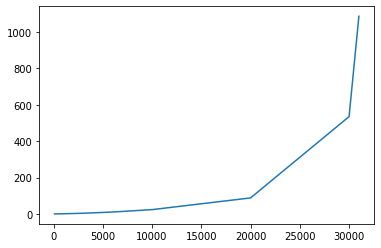

In [11]:
plt.plot(L_number_training_images,L_training_cpu_times)
plt.show()

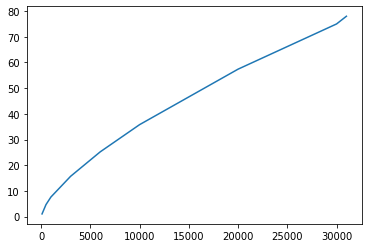

In [12]:
plt.plot(L_number_training_images,L_testing_cpu_times)
plt.show()

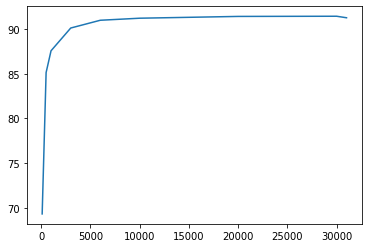

In [13]:
plt.plot(L_number_training_images,L_testing_scores)
plt.show()

# question c

In [5]:
%%time
modelkde = skneighbors.KernelDensity()
#modelkde.fit(X_train,train_labels)
modelkde.fit(X_train)
print(modelkde)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)
CPU times: user 1min 28s, sys: 552 ms, total: 1min 29s
Wall time: 1min 29s


In [6]:
%%time
#scorekde = modelkde.score(X_test, test_labels)
scorekde = modelkde.score(X_test)
print("KDE  score="+str(scorekde*100))

KDE  score=-368288374603.8299
CPU times: user 22min 20s, sys: 9.54 s, total: 22min 30s
Wall time: 22min 30s
